哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
dataA = pd.read_csv('A_lvr_land_A.csv')
dataA.info()
dataB = pd.read_csv('B_lvr_land_A.csv')
dataB.info()
dataE = pd.read_csv('E_lvr_land_A.csv')
dataE.info()
dataF = pd.read_csv('F_lvr_land_A.csv')
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8842 entries, 0 to 8841
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           8842 non-null   object 
 1   交易標的           8842 non-null   object 
 2   土地區段位置建物區段門牌   8842 non-null   object 
 3   土地移轉總面積平方公尺    8842 non-null   object 
 4   都市土地使用分區       8751 non-null   object 
 5   非都市土地使用分區      1 non-null      object 
 6   非都市土地使用編定      1 non-null      object 
 7   交易年月日          8842 non-null   object 
 8   交易筆棟數          8842 non-null   object 
 9   移轉層次           7765 non-null   object 
 10  總樓層數           7756 non-null   object 
 11  建物型態           8842 non-null   object 
 12  主要用途           7589 non-null   object 
 13  主要建材           7764 non-null   object 
 14  建築完成年月         7322 non-null   object 
 15  建物移轉總面積平方公尺    8842 non-null   object 
 16  建物現況格局-房       8842 non-null   object 
 17  建物現況格局-廳       8842 non-null   object 
 18  建物現況格局-衛

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14134 entries, 0 to 14133
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           14134 non-null  object 
 1   交易標的           14134 non-null  object 
 2   土地區段位置建物區段門牌   14134 non-null  object 
 3   土地移轉總面積平方公尺    14134 non-null  object 
 4   都市土地使用分區       12662 non-null  object 
 5   非都市土地使用分區      1008 non-null   object 
 6   非都市土地使用編定      1007 non-null   object 
 7   交易年月日          14134 non-null  object 
 8   交易筆棟數          14134 non-null  object 
 9   移轉層次           11574 non-null  object 
 10  總樓層數           11563 non-null  object 
 11  建物型態           14134 non-null  object 
 12  主要用途           9952 non-null   object 
 13  主要建材           11562 non-null  object 
 14  建築完成年月         11552 non-null  object 
 15  建物移轉總面積平方公尺    14134 non-null  object 
 16  建物現況格局-房       14134 non-null  object 
 17  建物現況格局-廳       14134 non-null  object 
 18  建物現況格局

In [3]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
dataA = dataA[dataA.index>0].reset_index()
display(dataA.head(5))
dataB = dataB[dataB.index>0].reset_index()
display(dataB.head(5))
dataE = dataE[dataE.index>0].reset_index()
display(dataE.head(5))
dataF = dataF[dataF.index>0].reset_index()
display(dataF.head(5))


,index,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,...,156583,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN
1,2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,...,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN
2,3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,...,181472,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN
3,4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,...,299450,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN
4,5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,...,147825,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN


,index,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,1,西區,房地(土地+建物),臺中市西區美村路一段181~210號,28.34,住,NaN,NaN,1090331,土地1建物1車位0,...,52925,NaN,0.0,0,NaN,RPVOMLLKNHPFFAB18CA,104.80,18.34,0.0,NaN
1,2,西區,房地(土地+建物),臺中市西區梅川西路一段91~120號,52.0,住,NaN,NaN,1090331,土地1建物1車位0,...,114379,NaN,0.0,0,NaN,RPPNMLMKNHPFFAB57CA,91.80,0.00,0.0,NaN
2,3,南區,房地(土地+建物)+車位,臺中市南區建國南路一段211~240號,23.4,住,NaN,NaN,1090418,土地1建物1車位1,...,68162,坡道平面,24.05,0,NaN,RPUNMLMKNHPFFAB08CA,110.26,19.34,0.0,NaN
3,4,西區,房地(土地+建物),臺中市西區東興路三段91~120號,84.0,住,NaN,NaN,1090403,土地1建物1車位0,...,118142,NaN,0.0,0,NaN,RPSOMLMKNHPFFAB97CA,211.61,0.00,0.0,NaN
4,5,南區,房地(土地+建物)+車位,臺中市南區文心南路871~900號,18.02,住,NaN,NaN,1090408,土地1建物1車位1,...,69796,坡道機械,9.82,0,NaN,RPWNMLNKNHPFFAB38CA,90.50,19.99,0.0,NaN


,index,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,1,鼓山區,房地(土地+建物)+車位,高雄市鼓山區明倫路121~150號,17.2,商,NaN,NaN,1090221,土地1建物2車位1,...,137122,升降機械,0.0,0,NaN,RPTNMLLKNHPFFAE18CA,139.45,4.14,0.0,NaN
1,2,鼓山區,房地(土地+建物)+車位,高雄市鼓山區昌盛路1~30號,7.55,商,NaN,NaN,1090410,土地1建物1車位1,...,66133,坡道機械,0.0,800000,NaN,RPVNMLLKNHPFFAE38CA,46.55,6.41,0.0,NaN
2,3,鹽埕區,建物,高雄市鹽埕區北斗街1~30號,0.0,NaN,NaN,NaN,1090511,土地0建物1車位0,...,13578,NaN,0.0,0,NaN,RPUNMLMKNHPFFAE38CA,33.22,1.85,0.0,NaN
3,4,鹽埕區,建物,高雄市鹽埕區大義街91~120號,0.0,NaN,NaN,NaN,1081216,土地0建物1車位0,...,5042,NaN,0.0,0,NaN,RPUNMLOKNHPFFAE58CA,26.85,0.00,0.0,NaN
4,5,前金區,房地(土地+建物)+車位,高雄市前金區河南二路151~180號,9.5,住,NaN,NaN,1090417,土地2建物1車位1,...,45331,坡道機械,0.0,0,NaN,RPTOMLOKNHPFFAE58CA,55.11,11.61,0.0,NaN


,index,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,1,板橋區,房地(土地+建物),新北市板橋區南雅東路1~30號,9.76,商,NaN,NaN,1090405,土地2建物1車位0,...,125589,NaN,0.0,0,含增建或未登記建物。;,RPQNMLMKNHPFFAF08CA,47.45,0.0,8.10,NaN
1,2,板橋區,房地(土地+建物)+車位,新北市板橋區縣民大道三段270巷1~30號,24.18,工,NaN,NaN,1090401,土地1建物1車位1,...,113039,坡道平面,38.09,0,含增建或未登記建物。;,RPRNMLMKNHPFFAF18CA,116.29,0.0,11.80,NaN
2,3,板橋區,房地(土地+建物),新北市板橋區南雅南路一段1~30號,3.2,商,NaN,NaN,1090316,土地1建物1車位0,...,99489,NaN,0.0,0,含增建或未登記建物。;,RPTNMLMKNHPFFAF38CA,23.02,0.0,4.94,NaN
3,4,板橋區,房地(土地+建物),新北市板橋區金門街103巷1~30號,32.58,住,NaN,NaN,1090410,土地2建物1車位0,...,88944,NaN,0.0,0,含增建或未登記建物。;,RPSNMLNKNHPFFAF38CA,80.55,0.0,16.14,NaN
4,5,板橋區,房地(土地+建物),新北市板橋區金華街10巷31~60號,87.0,住,NaN,NaN,1090330,土地1建物1車位0,...,145887,NaN,0.0,0,親友間買賣; 含增建部分,RPXNMLNKNHPFFAF88CA,89.11,0.0,0.00,NaN


In [4]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
dataA['city'] = '台北市'
display(dataA.head())
dataB['city'] = '台中市'
dataE['city'] = '高雄市'
dataF['city'] = '新北市'

,index,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
0,1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,台北市
1,2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,台北市
2,3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,台北市
3,4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,台北市
4,5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,台北市


In [5]:
#4. 將以上四份資料運用pd.concat()串接
data = pd.concat([dataA,dataB,dataE,dataF]).reset_index(drop=True)
data

,index,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
0,1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,台北市
1,2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,台北市
2,3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,台北市
3,4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,台北市
4,5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,台北市
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59471,19814,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,新北市
59472,19815,三峽區,土地,成福段成福小段331~360地號,762.0,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,...,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,新北市
59473,19816,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,新北市
59474,19817,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,新北市


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [6]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [7]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
data.rename(columns=columns_mapping, inplace=True)

In [8]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
data = data[(data['main_use']=='住家用') & (data['use_zoning']=='住')]
data = data[analysis_columns].dropna()
#data.isnull().sum()
data

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
0,台北市,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
1,台北市,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
4,台北市,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
6,台北市,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
7,台北市,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
48924,新北市,三重區,住家用,住,7280000,84.53,75.34,1090611,86123,5,0,5
49200,新北市,三重區,住家用,住,7350000,84.63,84.63,1090521,86849,4,0,4
49735,新北市,三重區,住家用,住,6000000,67.0,67.00,1090522,89552,1,1,1
49799,新北市,汐止區,住家用,住,11800000,124.31,98.54,1090507,94924,3,2,2


In [9]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
data= data.astype(columns_type)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 51169
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   int32  
 5   building_area_square_meter  7802 non-null   float64
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   float64
 9   room_number                 7802 non-null   int32  
 10  hall_number                 7802 non-null   int32  
 11  health_number               7802 non-null   int32  
dtypes: float64(3), int32(4), object(5)
memory usage: 670.5+ KB


In [10]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年  (取前3碼)
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
data['tx_dt_year'] = data['tx_dt'].apply(lambda x: str(x)[0:3])
#data['tx_dt_year']
data = data[data['tx_dt_year'] =='109']
data = data[(data['room_number']>=1) & (data['room_number']<=5)]
data = data[(data['hall_number']>=1) & (data['hall_number']<=2)]
data = data.reset_index(drop=True)
data

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,台北市,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,台北市,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,台北市,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,台北市,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,台北市,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,新北市,新店區,住家用,住,10500000,112.33,93.18,1090516,93475.0,3,2,2,109
6890,新北市,蘆洲區,住家用,住,9200000,92.14,86.55,1090529,99848.0,3,2,1,109
6891,新北市,三重區,住家用,住,6000000,67.00,67.00,1090522,89552.0,1,1,1,109
6892,新北市,汐止區,住家用,住,11800000,124.31,98.54,1090507,94924.0,3,2,2,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [11]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
data['building_area_square_feet'] = data['building_area_square_meter'] * 0.3025
data['main_building_area_square_feet'] = data['main_building_area'] * 0.3025
data['unit_price_square_feet'] = data['unit_price'] / 0.3025
data.head(5)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,台北市,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,台北市,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,台北市,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,台北市,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,台北市,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083


In [40]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料? => 觀察: unit_price 為0 資料異常
# 如果有請將資料移除，並說明為什麼移除此資料?  
import numpy as np

data.describe()
display(data[data['unit_price']==0])
#方法1: 移除單價為0的異常資料 
#data = data[data['unit_price']>0]

#方法2: 移除單價為0的異常資料 可用np.where() => return an array with "index" of matched data
print(np.where(data['unit_price']==0)[0])
data = data.drop(np.where(data['unit_price']==0)[0])
#data.shape


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
928,台北市,北投區,住家用,住,82000,0.97,0.0,1090608,0.0,3,2,2,109,0.293425,0.0,0.0
2699,台中市,北屯區,住家用,住,0,230.53,0.0,1090527,0.0,4,2,3,109,69.735325,0.0,0.0


[ 928 2699]


(6892, 16)

In [41]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
data.describe()


,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.892000e+03,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6.892000e+03
mean,1.139041e+07,121.713819,82.110488,94392.054991,2.850696,1.793239,1.733314,36.818430,24.838422,3.120399e+05
std,1.159452e+07,62.850341,37.342404,58303.607573,0.898520,0.405012,0.681006,19.012228,11.296077,1.927392e+05
min,1.000000e+05,1.030000,0.000000,3239.000000,1.000000,1.000000,0.000000,0.311575,0.000000,1.070744e+04
25%,5.580000e+06,82.975000,60.727500,53545.000000,2.000000,2.000000,1.000000,25.099937,18.370069,1.770083e+05
50%,8.555000e+06,109.390000,78.995000,79616.000000,3.000000,2.000000,2.000000,33.090475,23.895987,2.631934e+05
75%,1.330000e+07,147.472500,95.800000,118738.500000,3.000000,2.000000,2.000000,44.610431,28.979500,3.925240e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [45]:
# !!補充: 快速檢查各個"數值資料"變數間的相關程度 : 相關係數0.3以下為低相關，0.3~0.7為中等相關，0.7以上為高度相關
data.loc[data.city=='台北市'].corr()[['total_price','unit_price_square_feet']]

#觀察: building_area_square_meter, main_building_area 與 total_price 高度相關

,total_price,unit_price_square_feet
total_price,1.000000,0.581492
building_area_square_meter,0.864705,0.218777
main_building_area,0.710723,0.113380
unit_price,0.581492,1.000000
room_number,0.324975,-0.100680
hall_number,0.270233,0.004619
health_number,0.598129,0.127933
building_area_square_feet,0.864705,0.218777
main_building_area_square_feet,0.710723,0.113380
unit_price_square_feet,0.581492,1.000000


In [46]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
dfT = data[data['city']=='台北市']
#dfT
dfT = dfT.copy()
c = dfT.loc[:,'towns'].astype('category')
d = dict(enumerate(c.cat.categories))
print (d)
dfT.loc[:,'towns']=dfT.loc[:,'towns'].astype('category').cat.codes
dfT

{0: '中山區', 1: '中正區', 2: '信義區', 3: '內湖區', 4: '北投區', 5: '南港區', 6: '士林區', 7: '大同區', 8: '大安區', 9: '文山區', 10: '松山區', 11: '萬華區'}


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,台北市,9,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,台北市,9,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,台北市,9,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,台北市,9,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,台北市,9,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,台北市,11,住家用,住,17000000,100.07,68.12,1090611,169881.0,3,2,2,109,30.271175,20.606300,561590.082645
1374,台北市,3,住家用,住,20500000,137.05,85.30,1090605,149580.0,3,2,2,109,41.457625,25.803250,494479.338843
1375,台北市,8,住家用,住,66500000,269.06,114.05,1090615,247157.0,2,2,4,109,81.390650,34.500125,817047.933884
1376,台北市,2,住家用,住,14500000,102.90,91.69,1090531,140914.0,3,2,2,109,31.127250,27.736225,465831.404959


In [44]:
#遞廻特徵消除(RFE)：recursive feature elimination.
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#執行 包裝法
x=dfT[['towns', 'building_area_square_meter', 'main_building_area', 'unit_price', 'room_number','hall_number', 'health_number']]
y=dfT['total_price']

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(x, y)
## True= selected feature
print(selector.support_)
#Selected (i.e., estimated best) features are assigned rank 1.
ranking=selector.ranking_
print(ranking)
rfe_feature = x.loc[:,selector.support_].columns.tolist()
print(rfe_feature)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

[ True  True  True False False False False]
[1 1 1 2 3 4 5]
['towns', 'building_area_square_meter', 'main_building_area']


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
#連續 vs 離散 　（total_price　vs　towns）
import pingouin as pg

#運用 pg.anova 計算三種變異數
#描述一個離散型變數和連續型變數的相關性
#Eta Squared (η2); η2 是透過變異數分析的概念，所產生出來的指標

aov = pg.anova(dv='total_price', between='towns', data=dfT, detailed=True)
aov

C:\Anaconda3\lib\site-packages\dask\config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


,Source,SS,DF,MS,F,p-unc,np2
0,towns,3.672281e+16,11,3.338437e+15,8.854809,2.286121e-15,0.066605
1,Within,5.146318e+17,1365,3.770197e+14,NaN,NaN,NaN


In [48]:
#變異數換算得到 Eta Squared (𝜼^𝟐)
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

0.06660469390533467

In [49]:
#根據不同的領域，有各自的相關性強度的判斷，下表為 Cohen (1988) 提出的一種判斷方式
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)
judgment_etaSq(etaSq)

'Medium'

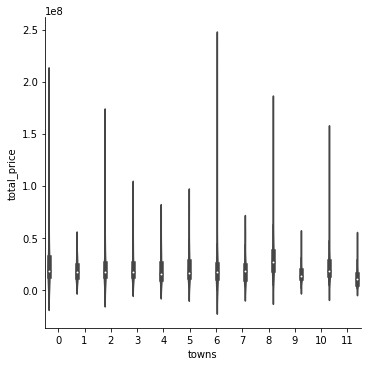

In [50]:
import seaborn as sns
g = sns.catplot(x="towns", y="total_price", hue="towns",
               data=dfT, kind="violin")

In [51]:
#連續 vs 連續
#透過 Pearson相關係數，看total_price　vs　main_building_area 相關性
#Pearson相關係數 是描述兩個連續型變數的相關性, Pearson 相關係數值介於 -1 vs 1。 (1: 正線性相關, -1:負線性相關)
#相關程度: <0.1 無線性相關  <0.4 低度線性相關  <0.7 中度線性相關  <1 高度線性相關  1 完全線性相關
from scipy import stats

# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, _=stats.pearsonr(dfT['building_area_square_meter'], dfT['total_price'])
print(corr)
corr, _=stats.pearsonr(dfT['main_building_area'], dfT['total_price'])
print(corr)

#結論: building_area_square_meter, main_building_area 與 total_price 高度相關

0.8647053372805192
0.7107228621572615


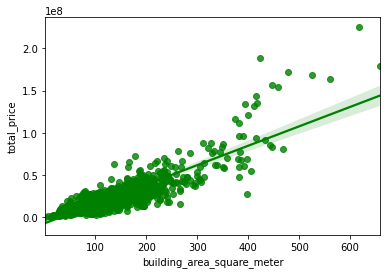

In [52]:
g = sns.regplot(x="building_area_square_meter", y="total_price", color="g",data=dfT)

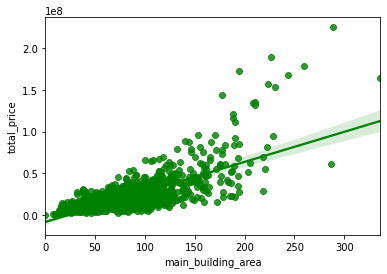

In [53]:
g = sns.regplot(x="main_building_area", y="total_price", color="g",data=dfT)

In [54]:
corr, _=stats.pearsonr(dfT['unit_price'], dfT['total_price'])
print(corr)

corr, _=stats.pearsonr(dfT['room_number'], dfT['total_price'])
print(corr)


0.5814923349695456
0.32497503148238804


In [55]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1377
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            1377 non-null   object 
 1   towns                           1377 non-null   int8   
 2   main_use                        1377 non-null   object 
 3   use_zoning                      1377 non-null   object 
 4   total_price                     1377 non-null   int32  
 5   building_area_square_meter      1377 non-null   float64
 6   main_building_area              1377 non-null   float64
 7   tx_dt                           1377 non-null   object 
 8   unit_price                      1377 non-null   float64
 9   room_number                     1377 non-null   int32  
 10  hall_number                     1377 non-null   int32  
 11  health_number                   1377 non-null   int32  
 12  tx_dt_year                      13

In [56]:
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

#遞廻特徵消除(RFE)：recursive feature elimination.
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#執行 包裝法
x=dfT[['towns', 'total_price', 'building_area_square_meter', 'main_building_area', 'room_number','hall_number', 'health_number']]
y=dfT['unit_price_square_feet'].astype('int')   #!! 數據集的標籤得是int型，float不行 !!

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(x, y)
## True= selected feature
print(selector.support_)
#Selected (i.e., estimated best) features are assigned rank 1.
ranking=selector.ranking_
print(ranking)
rfe_feature = x.loc[:,selector.support_].columns.tolist()
print(rfe_feature)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

[False  True  True  True False False False]
[2 1 1 1 3 4 5]
['total_price', 'building_area_square_meter', 'main_building_area']


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
#連續 vs 連續
#透過 Pearson相關係數，看total_price　vs　unit_price_square_feet 相關性
#Pearson相關係數 是描述兩個連續型變數的相關性, Pearson 相關係數值介於 -1 vs 1。 (1: 正線性相關, -1:負線性相關)
#相關程度: <0.1 無線性相關  <0.4 低度線性相關  <0.7 中度線性相關  <1 高度線性相關  1 完全線性相關
from scipy import stats

# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, _=stats.pearsonr(dfT['total_price'], dfT['unit_price_square_feet'])
print(corr)
corr, _=stats.pearsonr(dfT['building_area_square_meter'], dfT['unit_price_square_feet'])
print(corr)
corr, _=stats.pearsonr(dfT['main_building_area'], dfT['unit_price_square_feet'])
print(corr)

#結論: total_price 與 unit_price_square_feet 中度相關, 無高度相關變數

0.5814923349695454
0.2187767432815672
0.11337982129692951


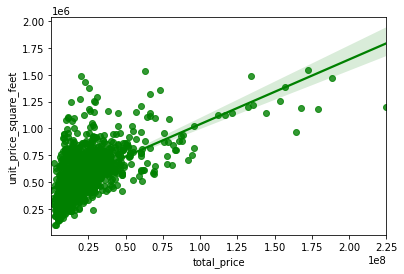

In [58]:
g = sns.regplot(x="total_price", y="unit_price_square_feet", color="g",data=dfT)

# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

In [59]:
data.head(5)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,台北市,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,台北市,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,台北市,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,台北市,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,台北市,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083


536320.6611570248


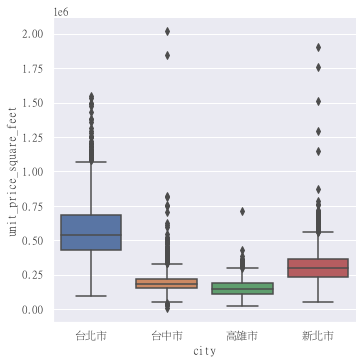

In [60]:
#！！　重要：　Label顯示中文字體 (設定: 新細明體字型路徑)
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\mingliu.ttc',size=14)
sns.set(font=myfont.get_name())

g = sns.catplot(x="city", y="unit_price_square_feet", 
               data=data, kind="box")
print(data[data['city']=='台北市']['unit_price_square_feet'].median())

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='city'>

<Figure size 1080x720 with 0 Axes>

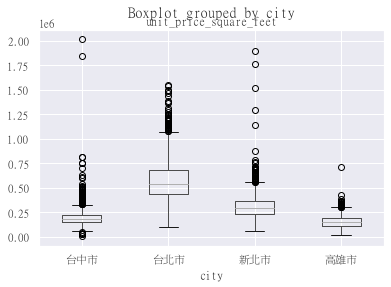

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區 =>台北市
data.boxplot(column=['unit_price_square_feet'], by='city')
#data.boxplot(column=['unit_price_square_feet'], by='city', figsize=(15,10))


<AxesSubplot:title={'center':'total_price'}, xlabel='room_number'>

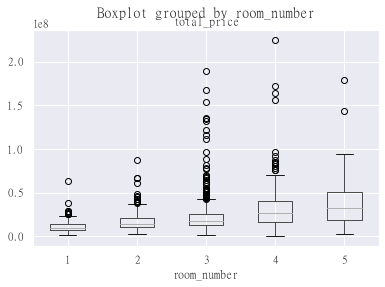

In [62]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。=>5房
data[data['city']=='台北市'].boxplot(column=['total_price'], by='room_number')


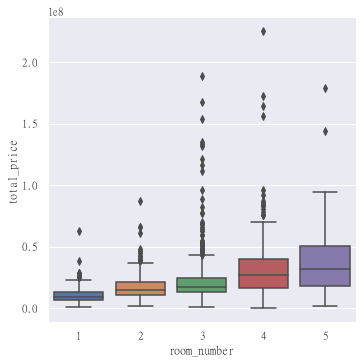

In [63]:
g = sns.catplot(x="room_number", y="total_price", 
               data=data[data['city']=='台北市'], kind="box")

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='towns'>

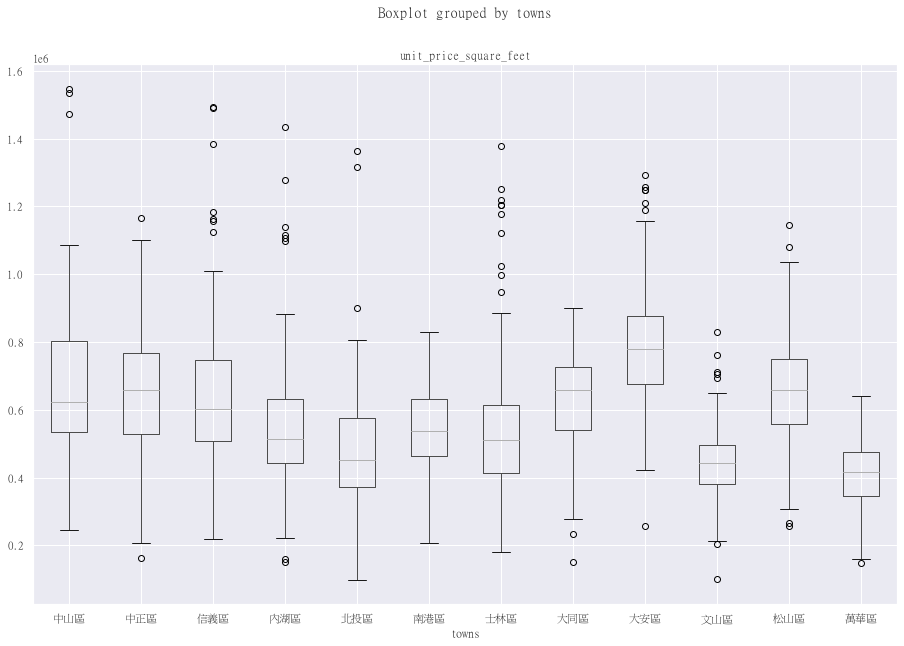

In [64]:
#3. 對台北市的資料做圖，先將地區(towns)做編碼在進行，再以地區(towns)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。=>大安區
# hint:運用LabelEncoder()對地區(towns)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder

data[data['city']=='台北市'].boxplot(column=['unit_price_square_feet'], by='towns', figsize=(15,10))

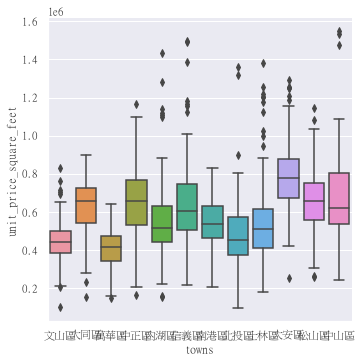

In [73]:
g = sns.catplot(x="towns", y="unit_price_square_feet", 
               data=data[data['city']=='台北市'], kind="box")

<AxesSubplot:xlabel='towns', ylabel='unit_price_square_feet'>

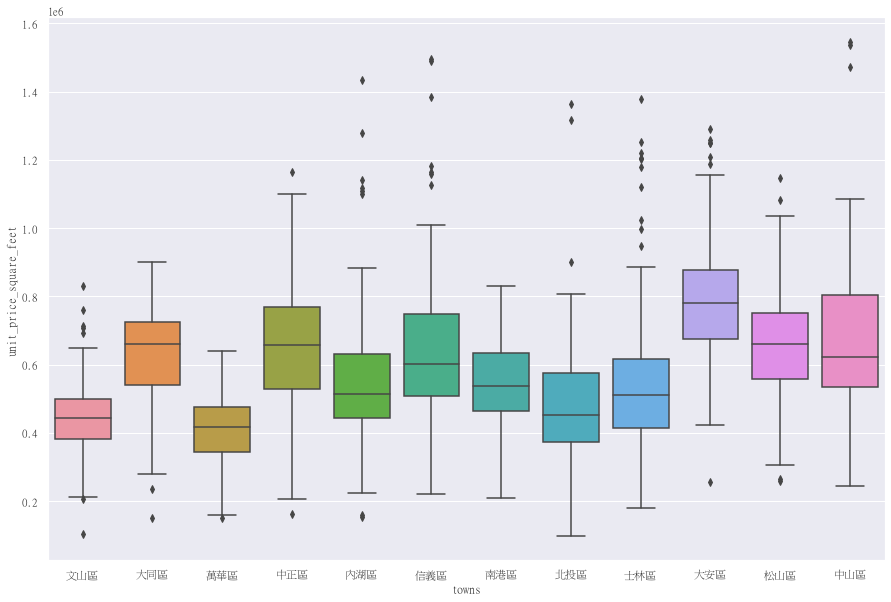

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

sns.boxplot(x="towns", y="unit_price_square_feet", 
               data=data[data['city']=='台北市'])

array(['大安區'], dtype=object)

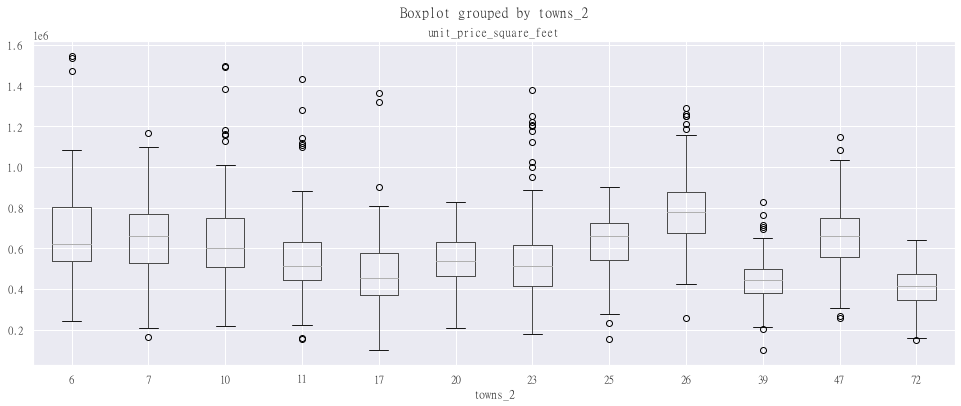

In [77]:
#補充: 運用LabelEncoder()對地區(towns)做編碼，運用.inverse_transform()反查編碼的地區
#from sklearn.preprocessing import LabelEncoder

#data['towns'].values

le = LabelEncoder().fit(data['towns'].values)
data['towns_2'] = le.transform(data['towns'].values)
data.loc[data.city=='台北市'].boxplot(column=['unit_price_square_feet'], by='towns_2',figsize=(16,6))

le.inverse_transform([26])